In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed 
seed(42)
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsRegressor

import scikitplot as skplt

ModuleNotFoundError: ignored

In [2]:
#Importing 
df = pd.read_csv("/content/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [14]:
df.isna().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [15]:
for column in df.columns:
    print(column, df[column].isna().sum()/df.shape[0]) #returns the fraction of NAN values

name 0.9738399026335157
a 2.38176331465237e-06
e 0.0
i 0.0
om 0.0
w 0.0
q 0.0
ad 7.14528994395711e-06
per_y 1.190881657326185e-06
data_arc 0.018427702765465386
condition_code 0.0010324943969018023
n_obs_used 0.0
H 0.003202280776550111
neo 7.14528994395711e-06
pha 0.01958047620975713
diameter 0.8360918122122533
extent 0.9999785641301682
albedo 0.8375530240057925
rot_per 0.9776161883688971
GM 0.9999833276567974
BV 0.9987841098278699
UB 0.9988341268574776
IR 0.9999988091183427
spec_B 0.9980159911588946
spec_T 0.9988329359758203
G 0.9998582850827782
moid 0.01958047620975713
class 0.0
n 2.38176331465237e-06
per 7.14528994395711e-06
ma 9.52705325860948e-06


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ce29d7450>,
      dtype=object)

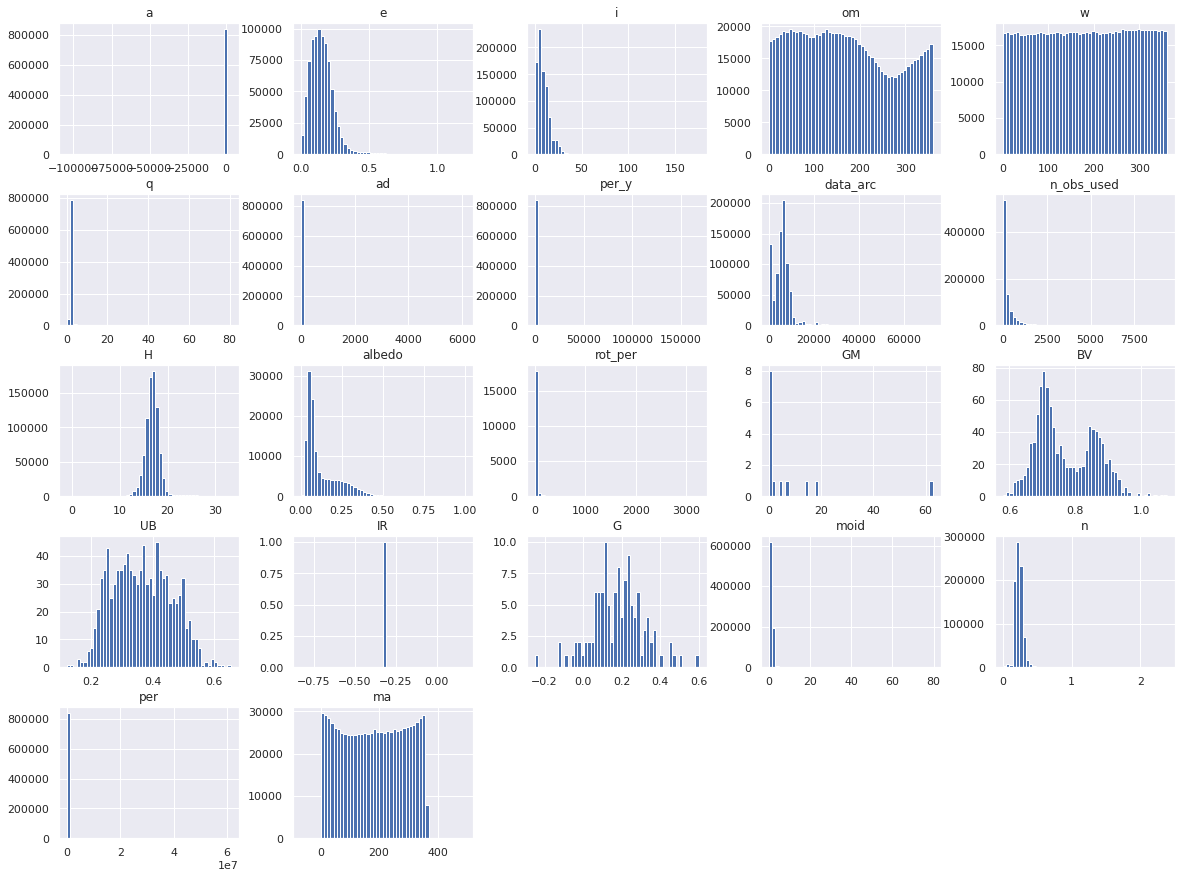

In [17]:
df.hist(bins = 50, figsize = (20,15))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


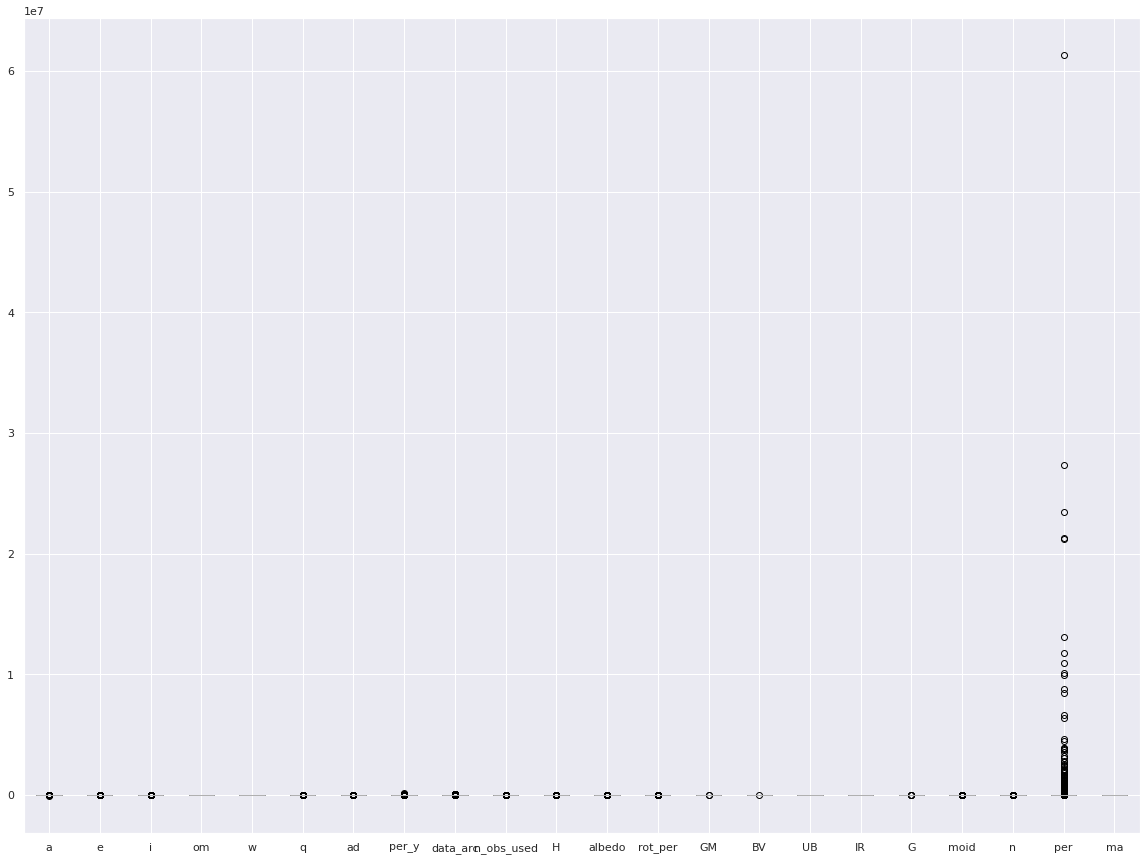

In [18]:
df.boxplot(figsize = (20,15))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

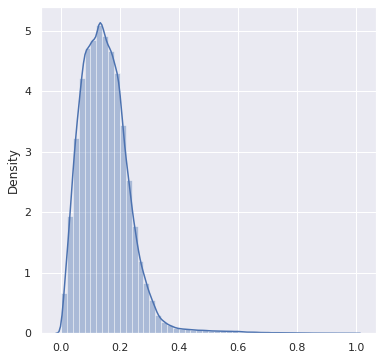

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df,x=df['e'])
plt.xlabel("Eccentricity")
plt.title("Distribution of eccentricity")
plt.show()

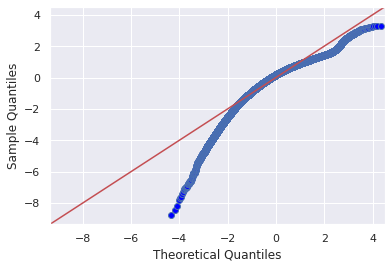

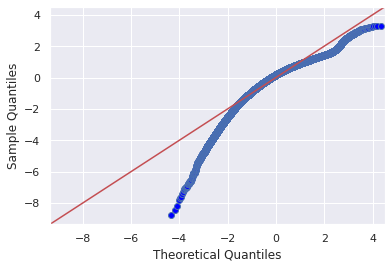

In [ ]:
import statsmodels.api as sm
e_log=np.log(df['e'])
sm.qqplot(e_log,line='45',fit=True)

We can see there is lot of deviation from straight line thus it doesn't follow log-normal distribution

Text(0.5, 1.0, 'Boxplot of eccentricity')

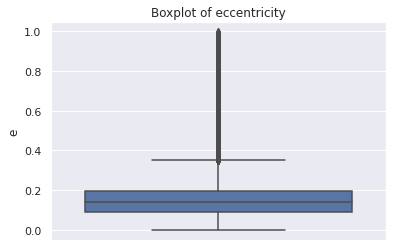

In [ ]:
sns.boxplot(data=df,y=df['e'])
plt.title("Boxplot of eccentricity")

In [19]:
print("minimum value of eccentricity columns is {}".format(min(df['e'])))
print("50 percentile of eccentricity column is {}".format(np.percentile(df['e'],50)))
print("95 percentile of eccentricity column is {}".format(np.percentile(df['e'],95)))
print("99 percentile eccentricity column is {}".format(np.percentile(df['e'],99)))
print("maximum value of eccentricity column is {}".format(max(df['e'])))

minimum value of eccentricity columns is 0.0
50 percentile of eccentricity column is 0.14365492769536964
95 percentile of eccentricity column is 0.30231105546709797
99 percentile eccentricity column is 0.5232731626039996
maximum value of eccentricity column is 1.201133796102373


Distribution of eccentricity seems to be like of log normal distribution though it is not we confirmed it using Q-Q plot . It have some outliers points which can be confirmed seeing difference in 99 percentile and maximum value.

In [4]:
## Convert diameter To float
convertDict = {'diameter' : float}
df = df.astype(convertDict) 
## correlation
corr_matrix = df.corr()
corr_matrix.columns
corr_matrix['diameter'].sort_values(ascending = False)

diameter      1.000000
GM            0.888500
data_arc      0.491603
n_obs_used    0.385747
moid          0.332423
q             0.329703
a             0.144736
ad            0.093430
i             0.052609
per           0.048953
per_y         0.048953
ma            0.009659
w             0.002966
om            0.001164
rot_per      -0.005480
G            -0.031286
e            -0.049133
albedo       -0.107397
UB           -0.175921
n            -0.201023
BV           -0.303947
H            -0.568655
IR                 NaN
Name: diameter, dtype: float64

In [5]:
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df = df.drop(dropindexes, axis=0) 

In [22]:
print(df['neo'])

0         N
1         N
2         N
3         N
4         N
         ..
797860    N
798077    N
798189    N
799752    N
810375    N
Name: neo, Length: 137636, dtype: object


In [6]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code'],axis=1)


In [7]:
df.isna().sum()

a                0
e                0
i                0
om               0
w                0
q                0
ad               0
per_y            0
data_arc       138
n_obs_used       0
H              747
neo              0
pha              0
diameter         0
albedo        1230
moid             0
class            0
n                0
per              0
ma               0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(df['neo'])
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
df['neo'] = onehot_encoder.fit_transform(integer_encoded)

print(df['neo'])

[0 0 0 ... 0 0 0]
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
797860    1.0
798077    1.0
798189    1.0
799752    1.0
810375    1.0
Name: neo, Length: 137636, dtype: float64


In [9]:
integer_encoded1 = label_encoder.fit_transform(df['pha'])
print(integer_encoded1)

integer_encoded1 = integer_encoded.reshape(len(integer_encoded1), 1)

df['pha'] = onehot_encoder.fit_transform(integer_encoded1)

print(df['pha'])

[0 0 0 ... 0 0 0]
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
797860    1.0
798077    1.0
798189    1.0
799752    1.0
810375    1.0
Name: pha, Length: 137636, dtype: float64


In [10]:
integer_encoded2 = label_encoder.fit_transform(df['class'])
print(integer_encoded2)

integer_encoded2 = integer_encoded.reshape(len(integer_encoded2), 1)

df['class'] = onehot_encoder.fit_transform(integer_encoded2)

print(df['class'])


[6 6 6 ... 6 6 6]
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
797860    1.0
798077    1.0
798189    1.0
799752    1.0
810375    1.0
Name: class, Length: 137636, dtype: float64


In [ ]:
#labelEnc = LabelEncoder()
#df['neo'] = labelEnc.fit_transform(df['neo'])
#df['pha'] = labelEnc.fit_transform(df['pha'])
#df['class'] = labelEnc.fit_transform(df['class'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


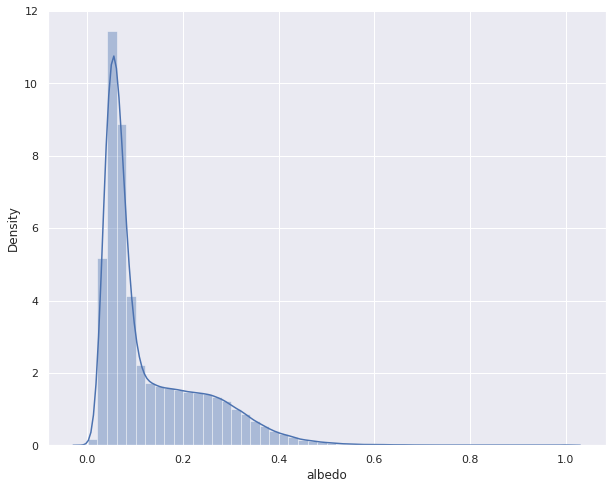

In [28]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.albedo)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


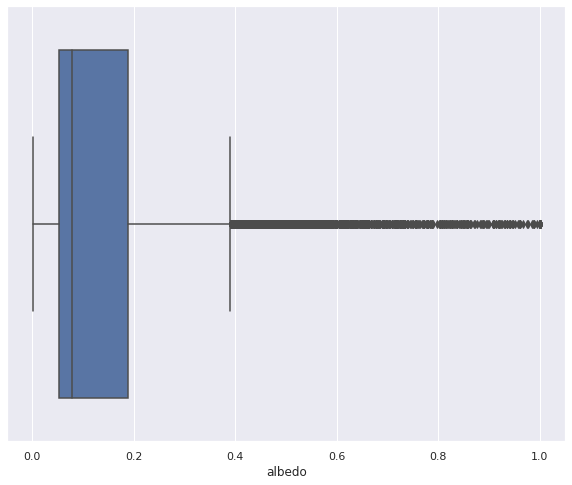

In [29]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.albedo)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


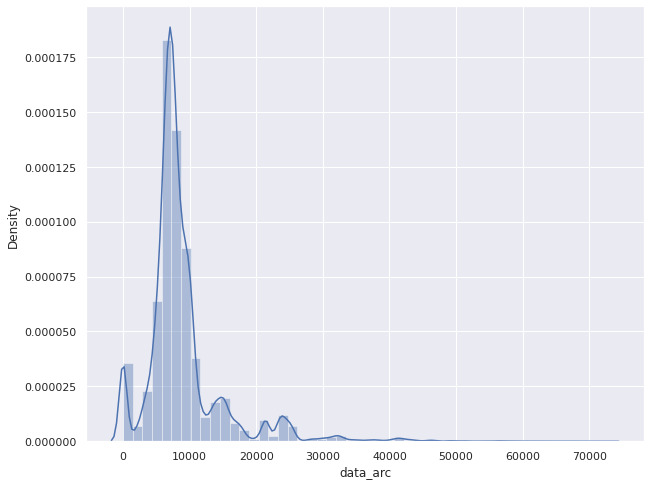

In [30]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.data_arc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


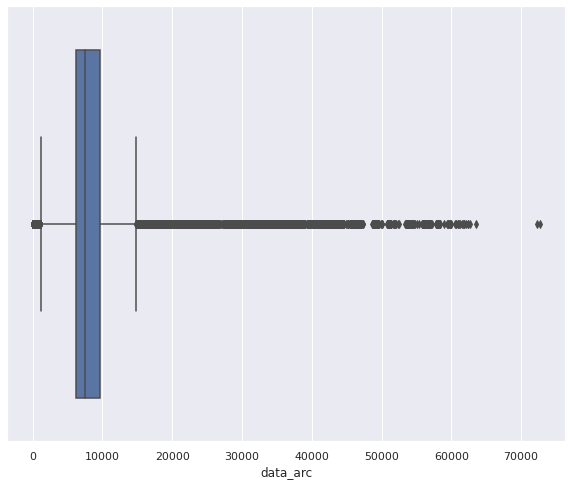

In [31]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.data_arc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


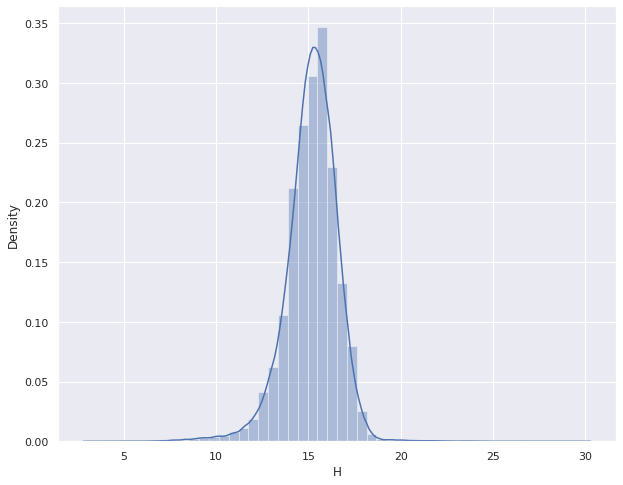

In [32]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.H)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


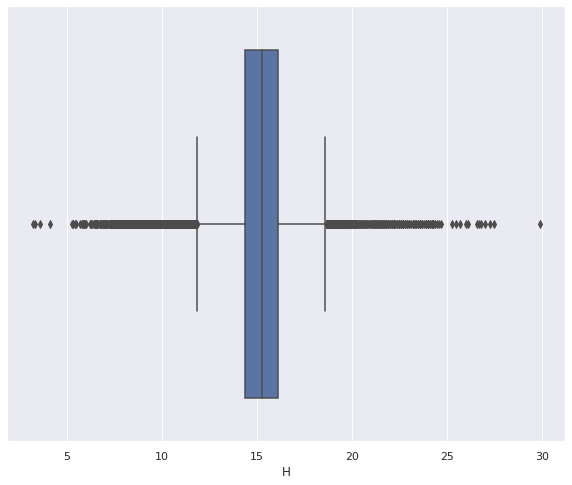

In [33]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.H)

In [11]:
df["H"] = df["H"].fillna(df["H"].mode()) 

In [35]:
df.describe

<bound method NDFrame.describe of                a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
797860  3.171225  0.159119  27.098625  309.036573   19.746812  2.666623   
798077  2.548410  0.076071  11.593237  246.298656  170.090810  2.354549   
798189  3.146246  0.220559  17.966646  137.981403  180.898833  2.452313   
799752  3.051336  0.287449  14.456779  343.917822  342.614839  2.174231   
810375  2.417477  0.109001   4.525668  148.244819   31.949854  2.153970   

              ad     per_y  data_arc  n_obs_used      H  neo  pha

In [12]:
df = df.fillna(df.median()) #because the data is skewed

In [37]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,1.0,1.0,939.400,0.0900,1.59478,1.0,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,1.0,1.0,545.000,0.1010,1.23324,1.0,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,1.0,1.0,246.596,0.2140,1.03454,1.0,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,1.0,1.0,525.400,0.4228,1.13948,1.0,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,1.0,1.0,106.699,0.2740,1.09589,1.0,0.238632,1508.600458,282.366289


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           137636 non-null  float64
 1   e           137636 non-null  float64
 2   i           137636 non-null  float64
 3   om          137636 non-null  float64
 4   w           137636 non-null  float64
 5   q           137636 non-null  float64
 6   ad          137636 non-null  float64
 7   per_y       137636 non-null  float64
 8   data_arc    137636 non-null  float64
 9   n_obs_used  137636 non-null  int64  
 10  H           137636 non-null  float64
 11  neo         137636 non-null  float64
 12  pha         137636 non-null  float64
 13  diameter    137636 non-null  float64
 14  albedo      137636 non-null  float64
 15  moid        137636 non-null  float64
 16  class       137636 non-null  float64
 17  n           137636 non-null  float64
 18  per         137636 non-null  float64
 19  ma

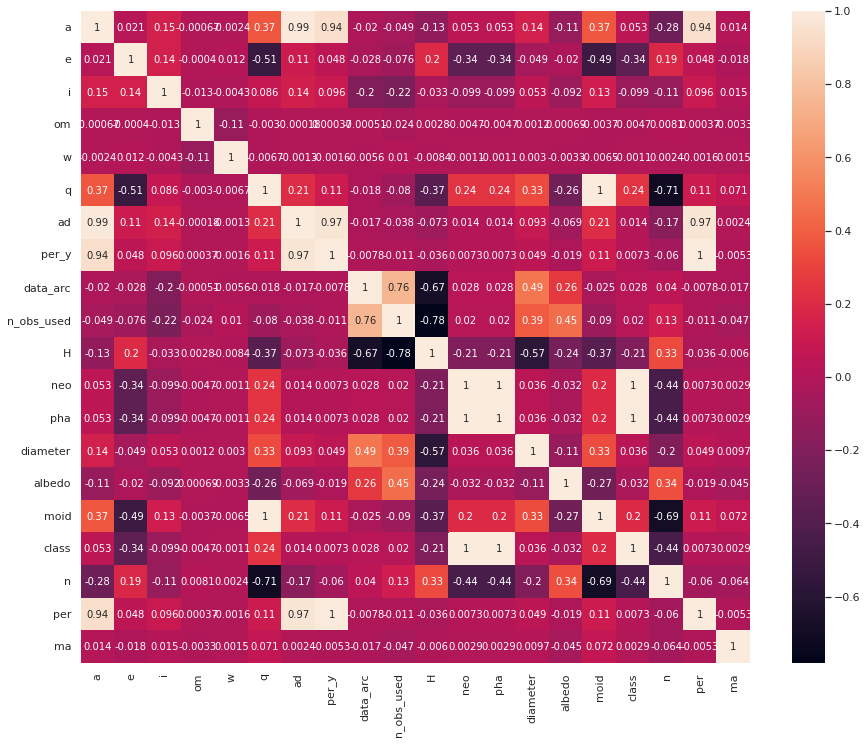

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.subplots(figsize=(15,12))
num_data = df.select_dtypes(include=numerics)
sns.heatmap(num_data.corr(),annot=True,annot_kws={'size':10})

Feature selection

In [14]:
df.drop('per_y', axis=1, inplace=True)
# per_y and per has exactly same correlation with every parameter

In [15]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Feature Engineering

I found an interesting formula on one of the NASA website(https://cneos.jpl.nasa.gov/tools/ast_size_est.html) to determine asteroid diameter using absolute magnitude(H) and geometric albedo(a)
d=10[3.1236−0.5log10(a)−0.2H]

In [16]:
#Function to estimate asteroid parameter 
import math
def est_diameter(a,h) :
  r=(3.1236-(0.5*math.log10(a))-(0.2*h))
  d=math.pow(10,r)
  return d
  

In [17]:
for index,value in X_train.iterrows() :
  a=value['albedo']
  h=value['H']
  X_train.at[index,'estimate_diameter']=est_diameter(a,h)

In [18]:
for index,value in X_test.iterrows() :
  a=value['albedo']
  h=value['H']
  X_test.at[index,'estimate_diameter']=est_diameter(a,h)

outliers

a                       AxesSubplot(0.125,0.816017;0.133621x0.0639831)
e                    AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
i                     AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
om                   AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
w                    AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
q                       AxesSubplot(0.125,0.739237;0.133621x0.0639831)
ad                   AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
data_arc              AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
n_obs_used           AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
H                    AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
neo                     AxesSubplot(0.125,0.662458;0.133621x0.0639831)
pha                  AxesSubplot(0.285345,0.662458;0.133621x0.0639831)
albedo                AxesSubplot(0.44569,0.662458;0.133621x0.0639831)
moid                 AxesSubplot(0.606034,0.662458;0.133621x0.0639831)
class 

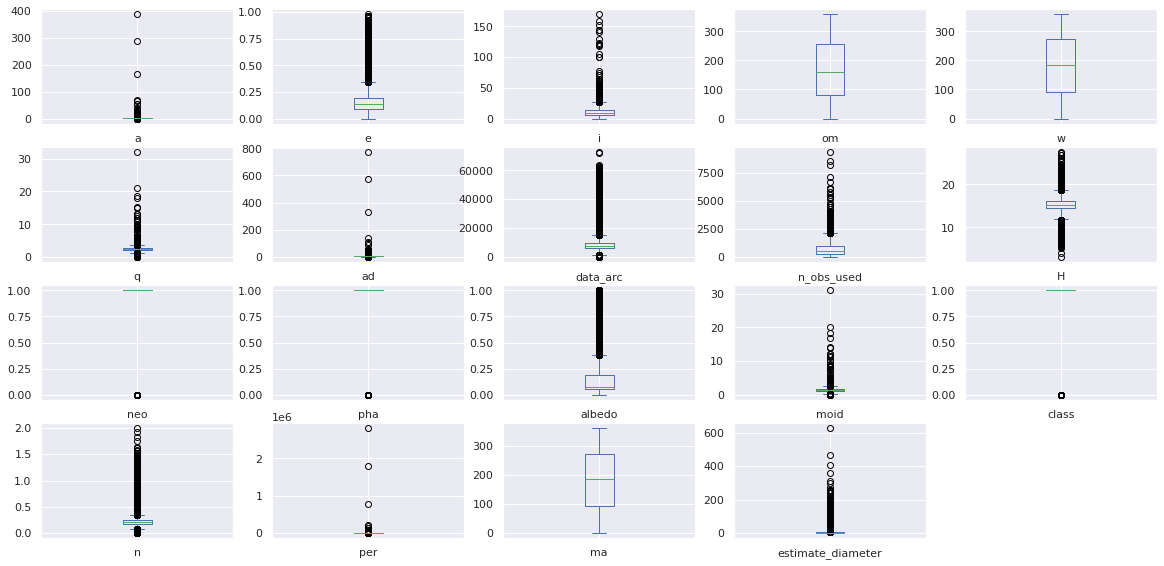

In [45]:
X_train.plot(kind="box",subplots=True,layout=(10,5),figsize=(20,25))

no outliers in om, w and ma

In [19]:
upper_limit = X_train['data_arc'].quantile(0.97)
lower_limit = X_train['data_arc'].quantile(0.03)
X_train['data_arc'] = np.where(X_train['data_arc'] >= upper_limit,
        upper_limit, np.where(X_train['data_arc'] <= lower_limit,lower_limit,X_train['data_arc']))

In [20]:
upper_limit = X_train['n'].quantile(0.97)
lower_limit = X_train['n'].quantile(0.03)
X_train['n'] = np.where(X_train['n'] >= upper_limit,
        upper_limit, np.where(X_train['n'] <= lower_limit,lower_limit,X_train['n']))

In [21]:
upper_limit = X_train['H'].quantile(0.97)
lower_limit = X_train['H'].quantile(0.03)
X_train['H'] = np.where(X_train['H'] >= upper_limit,
        upper_limit, np.where(X_train['H'] <= lower_limit,lower_limit,X_train['H']))

In [22]:
upper_limit = X_train['e'].quantile(0.97)
lower_limit = X_train['e'].quantile(0.03)
X_train['e'] = np.where(X_train['e'] >= upper_limit,
        upper_limit, np.where(X_train['e'] <= lower_limit,lower_limit,X_train['e']))

normalization

In [23]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

trying different regressions and ranking them according to their R2 score

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
   
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
    
algorithms = []
scores = []

LINEAR REGRESSION

In [67]:
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = score(Y_pred_lr)
announce(score_lr)

algorithms.append('LR')
scores.append(score_lr)

abs_error = mean_absolute_error(Y_pred_lr,Y_test)
squared_error = mean_squared_error(Y_pred_lr,Y_test)
median_error = median_absolute_error(Y_pred_lr,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

The R^2 score achieved using this regression is: 0.987
The mean absolute error using this regression is: 0.464
The mean squared error using this regression is: 1.707
The median absolute error using this regression is: 0.254


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


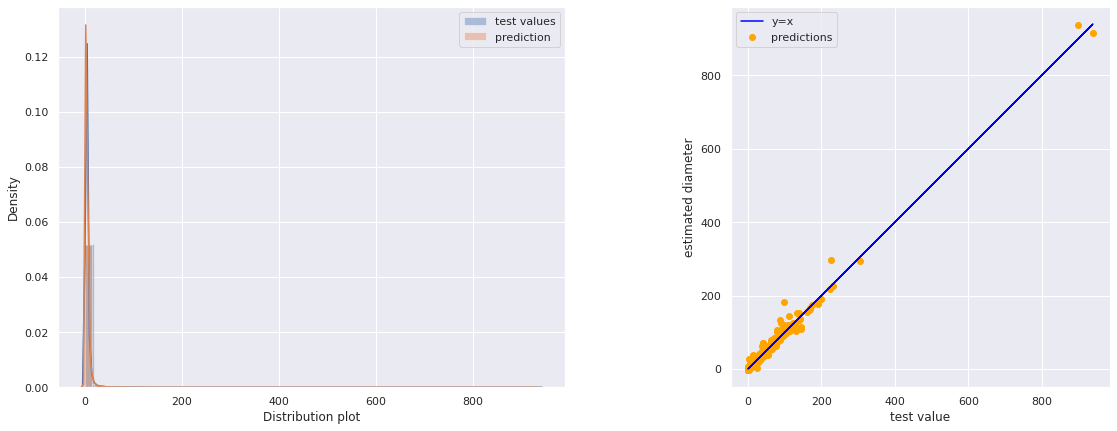

In [53]:
plot(Y_pred_lr)

k-Nearest Neighbours regression

In [68]:
### Defining the Model

from sklearn.neighbors import KNeighborsRegressor

##For weighted metric, more accurate but longer calculation
#weights = X_train_norm.corrwith(Y_train).abs()
#neigh = KNeighborsRegressor(n_neighbors=3, metric_params={'w' : weights.values}, metric='wminkowski')

neigh = KNeighborsRegressor(n_neighbors=3)

### Training
neigh.fit(X_train_norm,Y_train)

### Predicting 
Y_pred_neigh = neigh.predict(X_test_norm)

### Scoring
score_neigh=score(Y_pred_neigh)
announce(score_neigh)

algorithms.append('k-NN')
scores.append(score_neigh)

abs_error = mean_absolute_error(Y_pred_neigh,Y_test)
squared_error = mean_squared_error(Y_pred_neigh,Y_test)
median_error = median_absolute_error(Y_pred_neigh,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

The R^2 score achieved using this regression is: 0.422
The mean absolute error using this regression is: 0.808
The mean squared error using this regression is: 29.822
The median absolute error using this regression is: 0.392


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


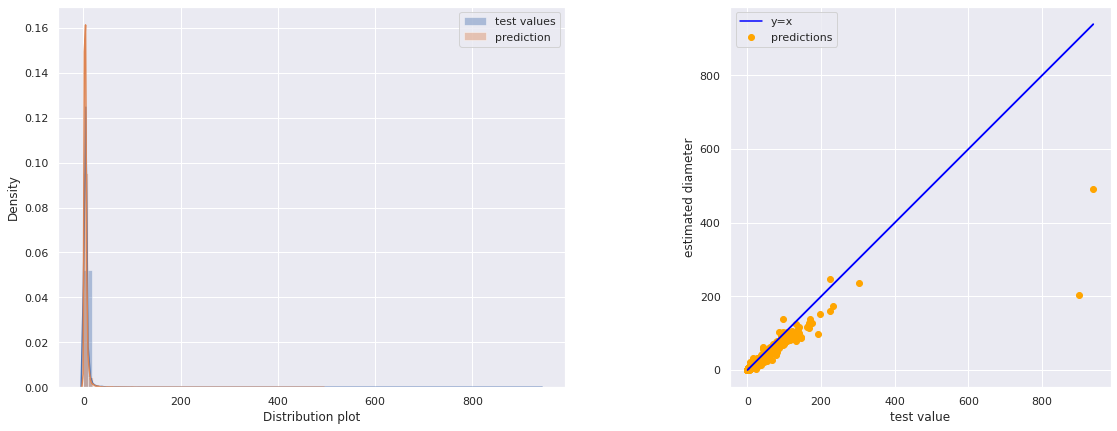

In [56]:
plot(Y_pred_neigh)

Random Forest Regressor

In [69]:
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=32, n_estimators=100)

### Training 
forest.fit(X_train_norm,np.ravel(Y_train))

###Predicting
Y_pred_forest = forest.predict(X_test_norm)

### Scoring
score_forest = score(Y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

abs_error = mean_absolute_error(Y_pred_forest,Y_test)
squared_error = mean_squared_error(Y_pred_forest,Y_test)
median_error = median_absolute_error(Y_pred_forest,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

The R^2 score achieved using this regression is: 0.554
The mean absolute error using this regression is: 0.813
The mean squared error using this regression is: 23.073
The median absolute error using this regression is: 0.523


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


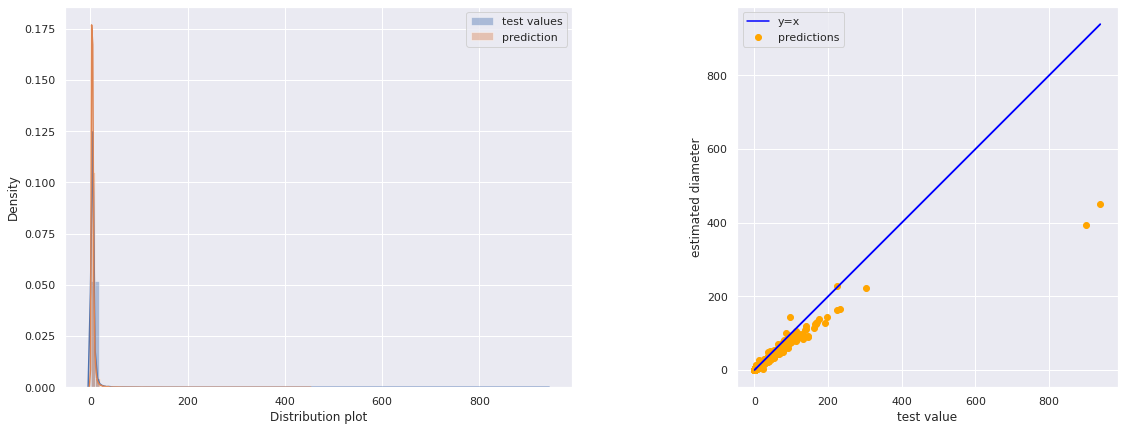

In [41]:
plot(Y_pred_forest)

XGBoost regression

In [42]:
### Defining the model
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 1000)

### Training
xgReg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test_norm)

### Scoring
score_xgb = score(Y_pred_xgb)
announce(score_xgb)

algorithms.append('XGB')
scores.append(score_xgb)

abs_error = mean_absolute_error(Y_pred_xgb,Y_test)
squared_error = mean_squared_error(Y_pred_xgb,Y_test)
median_error = median_absolute_error(Y_pred_xgb,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

The R^2 score achieved using this regression is: 0.407
The mean absolute error using this regression is: 0.962
The mean squared error using this regression is: 33.123
The median absolute error using this regression is: 0.479


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


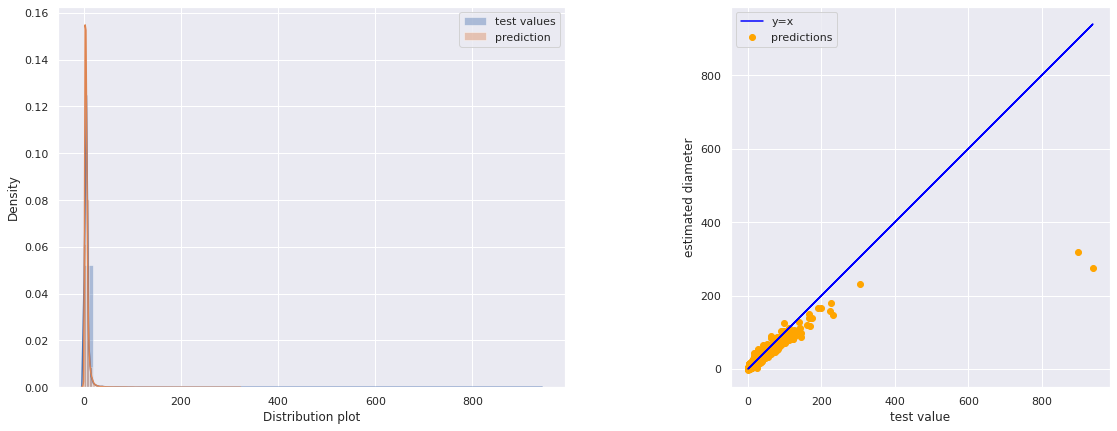

In [43]:
plot(Y_pred_xgb)

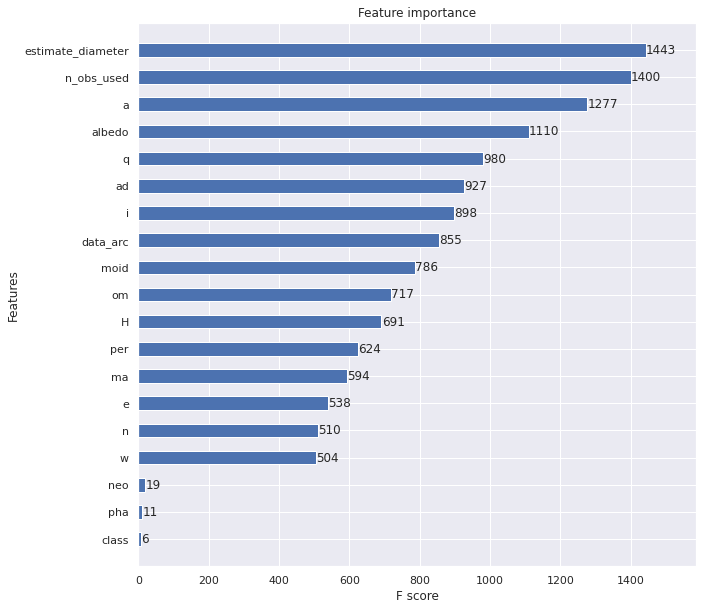

In [44]:
# One bonus of using xgboost is being able to 
# simply see how important the different features where when creating the learners.

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgReg, height=0.5, ax=ax, importance_type='weight')
plt.show()

Decision Tree

In [64]:
### Defining the model
from sklearn import tree
decTree = tree.DecisionTreeRegressor()

### Training
decTree = decTree.fit(X_train_norm,Y_train)

### Predicting
Y_pred_tree = decTree.predict(X_test_norm)

### Scoring
score_tree = score(Y_pred_tree)
announce(score_tree)

algorithms.append('DTree')
scores.append(score_tree)

abs_error = mean_absolute_error(Y_pred_tree,Y_test)
squared_error = mean_squared_error(Y_pred_tree,Y_test)
median_error = median_absolute_error(Y_pred_tree,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

The R^2 score achieved using this regression is: 0.582
The mean absolute error using this regression is: 0.961
The mean squared error using this regression is: 22.622
The median absolute error using this regression is: 0.606


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


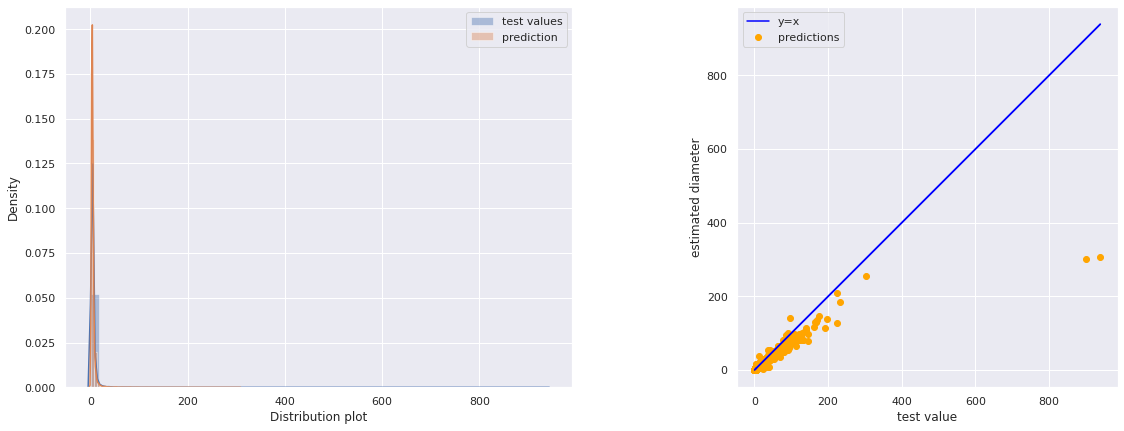

In [62]:
plot(Y_pred_tree)

LGBM Regression

In [63]:
#lgbm model
# build the lightgbm model
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train_norm,Y_train)
Y_pred_lgbm =model_lgb.predict(X_test_norm)

score_lgbm = score(Y_pred_lgbm)
announce(score_lgbm)

algorithms.append('LGBM')
scores.append(score_lgbm)

abs_error = mean_absolute_error(Y_pred_lgbm,Y_test)
squared_error = mean_squared_error(Y_pred_lgbm,Y_test)
median_error = median_absolute_error(Y_pred_lgbm,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

The R^2 score achieved using this regression is: -0.129
The mean absolute error using this regression is: 0.844
The mean squared error using this regression is: 52.832
The median absolute error using this regression is: 0.517


In [64]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
hypertuning_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
model_lgb = GridSearchCV(lgb.LGBMRegressor(), hypertuning_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
model_lgb.fit(X_train_norm, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   1.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.877 total time=   1.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.858 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   1.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   1.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.877 total time=   1.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.858 total time=   1.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   1.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   1.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


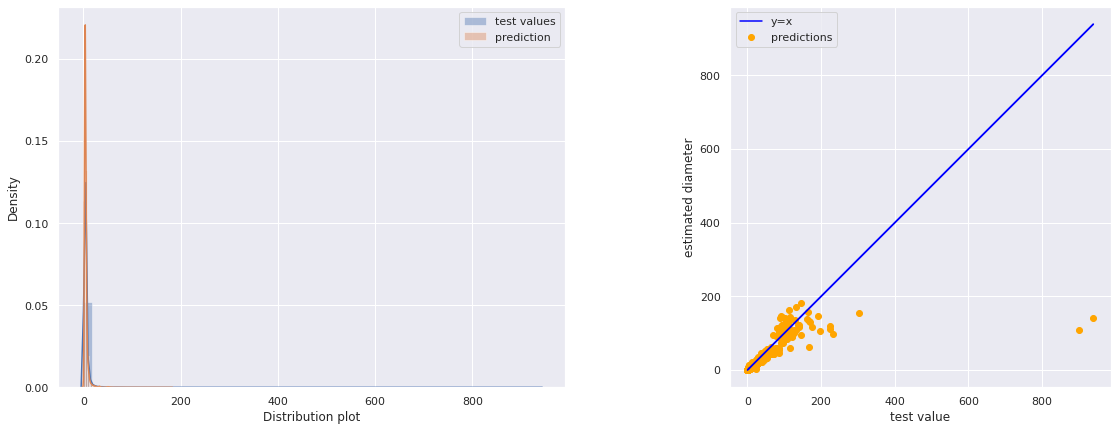

In [65]:
plot(Y_pred_lgbm)

Deep Neural Network regression:

In [73]:
from tensorflow import keras
def build_model(n_h=1,n_n=30,lr=3e-3,input_shape=X_train.shape[1:]):
    ann = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_h):
        ann.add(keras.layers.Dense(n_n, activation="relu", **options))
        options = {}
    ann.add(keras.layers.Dense(1,activation="linear", **options))
    lr_adp = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lr,decay_steps=100,decay_rate=0.9)
    optimizer1 = keras.optimizers.SGD(lr_adp,momentum=0.9)
    ann.compile(loss='mean_absolute_error', optimizer=optimizer1, metrics=['mean_absolute_error'])
    return ann

In [74]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [75]:
keras_reg.fit(X_train_norm,Y_train,epochs=100,validation_data=(X_test_norm, Y_test))

Epoch 1/100
3441/3441 [==============================] - 7s 2ms/step - loss: 0.5817 - mean_absolute_error: 0.5817 - val_loss: 0.8487 - val_mean_absolute_error: 0.8487
Epoch 2/100
3441/3441 [==============================] - 7s 2ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - val_loss: 0.8531 - val_mean_absolute_error: 0.8531
Epoch 3/100
3441/3441 [==============================] - 7s 2ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - val_loss: 0.8541 - val_mean_absolute_error: 0.8541
Epoch 4/100
3441/3441 [==============================] - 7s 2ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - val_loss: 0.8541 - val_mean_absolute_error: 0.8541
Epoch 5/100
3441/3441 [==============================] - 7s 2ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - val_loss: 0.8541 - val_mean_absolute_error: 0.8541
Epoch 6/100
3441/3441 [==============================] - 7s 2ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - val_loss: 0.8541 - val_mean_absolute_error: 0.854

In [76]:
Y_pred_dnn = keras_reg.predict(X_test_norm)

### Scoring
score_dnn = score(Y_pred_dnn)
announce(score_dnn)

algorithms.append('DNN')
scores.append(score_dnn)

abs_error = mean_absolute_error(Y_pred_dnn,Y_test)
squared_error = mean_squared_error(Y_pred_dnn,Y_test)
median_error = median_absolute_error(Y_pred_dnn,Y_test)
print('The mean absolute error using this regression is:', round(abs_error,3))
print('The mean squared error using this regression is:', round(squared_error,3))
print('The median absolute error using this regression is:', round(median_error,3))

861/861 [==============================] - 1s 1ms/step
The R^2 score achieved using this regression is: 0.909
The mean absolute error using this regression is: 0.854
The mean squared error using this regression is: 7.199
The median absolute error using this regression is: 0.541


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


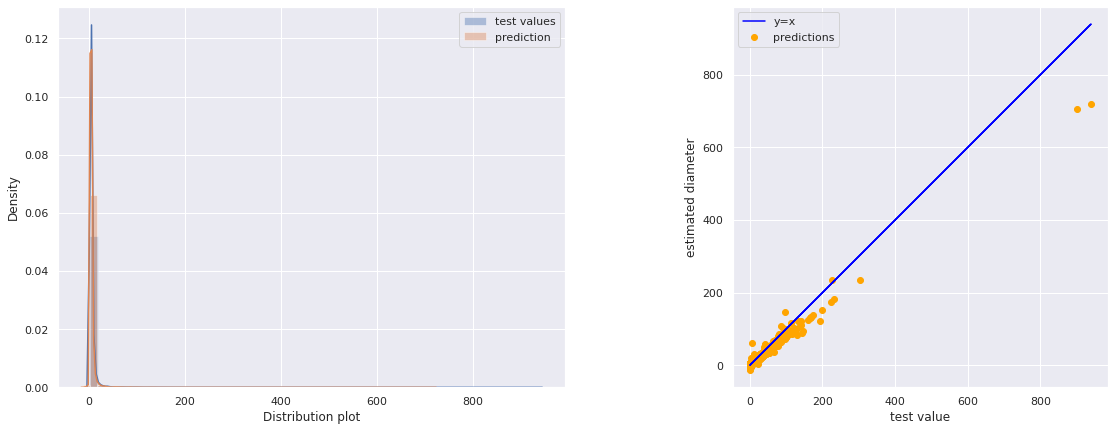

In [77]:
plot(Y_pred_dnn)

Comparing all regression algorithms

In [ ]:
print( algorithms, scores)

Therefore the best r2 score is **0.987**